In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # CORRIGIDO

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [4]:

y_pred

array([1])

Saving figure perceptron_iris_plot


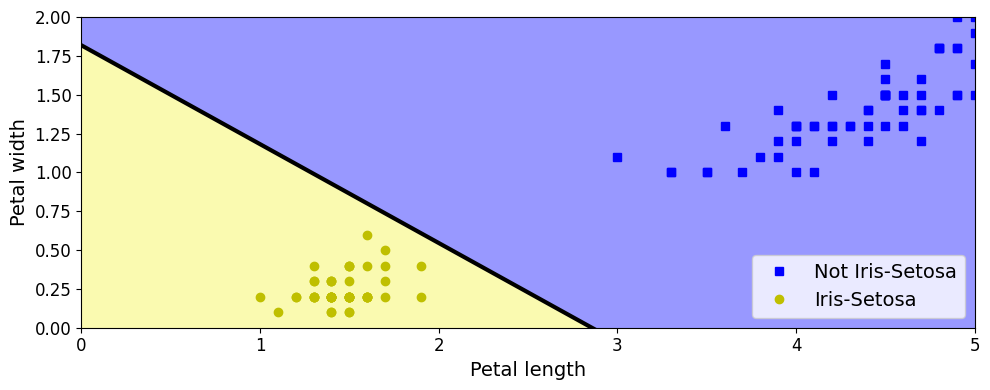

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


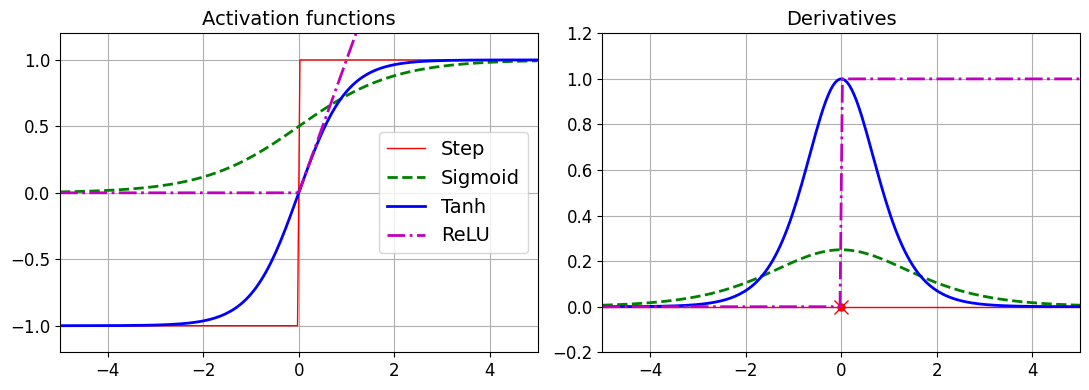

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

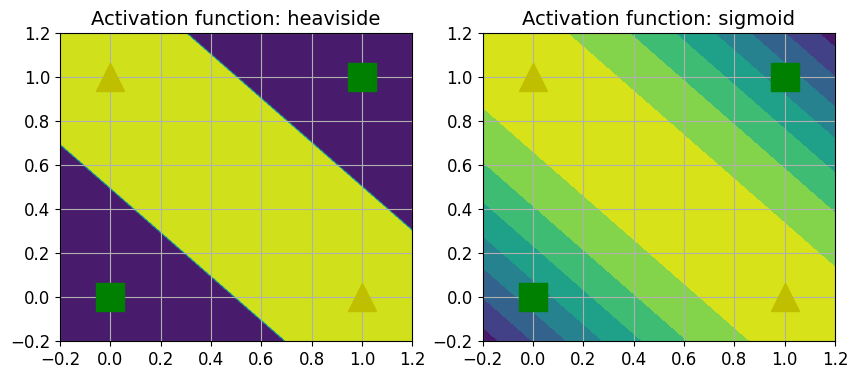

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.10.0'

In [12]:
keras.__version__

'2.10.0'

In [13]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [14]:

X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

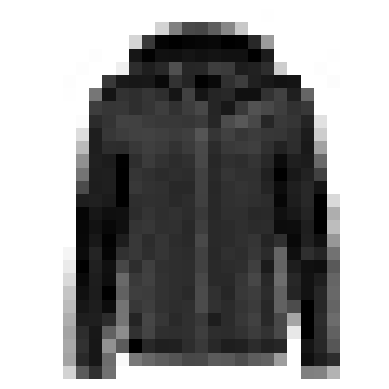

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
class_names[y_train[0]]

'Coat'

In [21]:

X_valid.shape

(5000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


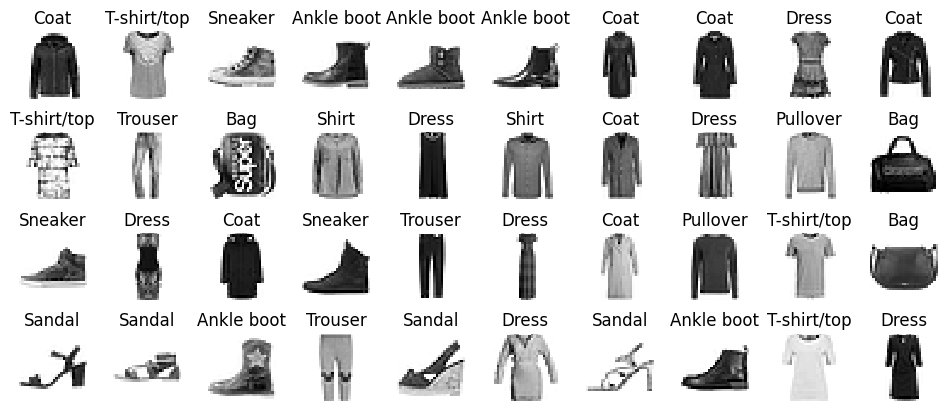

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer(hidden1.name) is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights

array([[-0.05927998,  0.01283566,  0.03969764, ..., -0.01248672,
        -0.05663663, -0.01507987],
       [-0.00279942, -0.06821845,  0.05925469, ...,  0.04641213,
         0.03461579,  0.01711442],
       [-0.03902173,  0.02054632, -0.02676953, ...,  0.06028958,
         0.0712477 ,  0.01958124],
       ...,
       [-0.05085443,  0.06793341, -0.03722986, ...,  0.05773605,
        -0.04563299, -0.05522794],
       [-0.06013237, -0.03624601, -0.00817282, ...,  0.02851119,
         0.0347622 ,  0.02763926],
       [-0.01802324,  0.0307947 ,  0.04549769, ..., -0.01480616,
         0.00124041,  0.01002873]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7300 - accuracy: 0.7613 - val_loss: 0.5310 - val_accuracy: 0.8188
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4898 - accuracy: 0.8288 - val_loss: 0.4427 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4436 - accuracy: 0.8438 - val_loss: 0.5447 - val_accuracy: 0.7972
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4171 - accuracy: 0.8548 - val_loss: 0.3988 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3988 - accuracy: 0.8606 - val_loss: 0.3818 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3801 - accuracy: 0.8664 - val_loss: 0.3766 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3680 - accuracy: 0.8700 - val_loss: 0.3673 - val_accuracy:

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


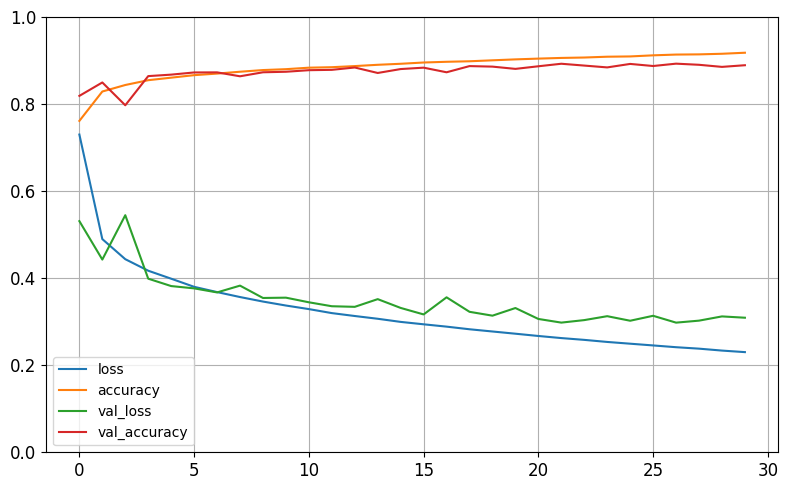

In [45]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3397 - accuracy: 0.8793


[0.3396776616573334, 0.8792999982833862]

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 170ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [48]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 66ms/step


array([9, 2, 1], dtype=int64)

In [49]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [50]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


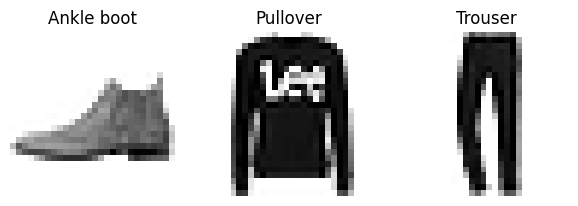

In [51]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [52]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.4973 - val_loss: 0.7765
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7058 - val_loss: 0.6741
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6393 - val_loss: 0.6413
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6005 - val_loss: 0.5961
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5706 - val_loss: 0.5595
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5462 - val_loss: 0.5363
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5265 - val_loss: 0.5327
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5103 - val_loss: 0.4993
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4966 - val_loss: 0.4862
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4850 - val_loss: 0.4733

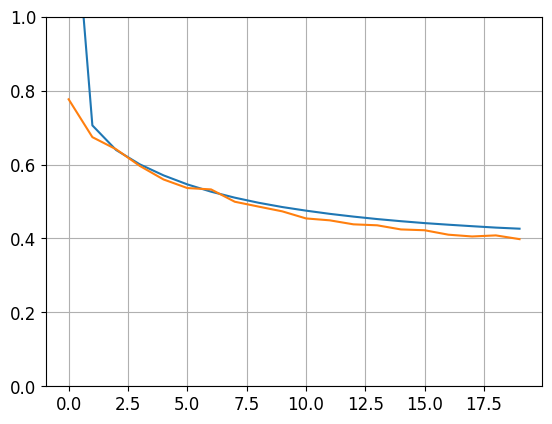

In [55]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
y_pred

array([[0.6010833],
       [1.6172647],
       [3.2973692]], dtype=float32)

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [60]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1985 - val_loss: 16.0435
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9530 - val_loss: 3.5776
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6990 - val_loss: 2.6912
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6481 - val_loss: 0.9813
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5831 - val_loss: 0.5340
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5484 - val_loss: 0.5801
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5252 - val_loss: 0.5063
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5062 - val_loss: 0.5281
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4896 - val_loss: 0.4891
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4776 - val_loss: 0.479

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4796 - val_loss: 0.9048
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7632 - val_loss: 0.8020
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6460 - val_loss: 0.6477
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6001 - val_loss: 0.5654
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5710 - val_loss: 0.5410
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5462 - val_loss: 0.5244
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5262 - val_loss: 0.5380
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5089 - val_loss: 0.4801
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4934 - val_loss: 0.4692
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4808 - val_loss: 0.4884

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [66]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [67]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6062 - main_output_loss: 2.2601 - aux_output_loss: 5.7206 - val_loss: 1.3671 - val_main_output_loss: 0.9826 - val_aux_output_loss: 4.8267
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0644 - main_output_loss: 0.7447 - aux_output_loss: 3.9409 - val_loss: 1.0039 - val_main_output_loss: 0.6978 - val_aux_output_loss: 3.7591
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8360 - main_output_loss: 0.6267 - aux_output_loss: 2.7197 - val_loss: 0.8621 - val_main_output_loss: 0.5932 - val_aux_output_loss: 3.2826
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7271 - main_output_loss: 0.5820 - aux_output_loss: 2.0324 - val_loss: 0.8118 - val_main_output_loss: 0.5562 - val_aux_output_loss: 3.1121
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6628 - main_output_loss: 0.5531 - aux_output_loss: 1.6499 - val_loss

In [68]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 67ms/step


In [69]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [70]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.4624 - output_1_loss: 2.1944 - output_2_loss: 4.8744 - val_loss: 2.0508 - val_output_1_loss: 1.6804 - val_output_2_loss: 5.3843
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 1.1345 - output_1_loss: 0.9053 - output_2_loss: 3.1969 - val_loss: 1.2334 - val_output_1_loss: 0.8223 - val_output_2_loss: 4.9337
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9185 - output_1_loss: 0.7741 - output_2_loss: 2.2177 - val_loss: 1.1568 - val_output_1_loss: 0.7581 - val_output_2_loss: 4.7450
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8109 - output_1_loss: 0.7085 - output_2_loss: 1.7324 - val_loss: 1.0932 - val_output_1_loss: 0.7012 - val_output_2_loss: 4.6207
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7433 - output_1_loss: 0.6599 - output_2_loss: 1.4934 - val_loss: 1.0183 - val_output_1_loss: 0.6472 - val_ou

In [71]:
np.random.seed(42)
tf.random.set_seed(42)

In [72]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [73]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1363 - val_loss: 1.1028
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8254 - val_loss: 1.0017
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6908 - val_loss: 0.8978
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6355 - val_loss: 0.6424
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5938 - val_loss: 0.5574
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5593 - val_loss: 0.5269
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5320 - val_loss: 0.5022
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5097 - val_loss: 0.4730
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4912 - val_loss: 0.4575
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4671


In [74]:
model.save("my_keras_model.h5")

In [75]:
model = keras.models.load_model("my_keras_model.h5")

In [76]:
model.predict(X_new)

1/1 [==============================] - 0s 48ms/step


array([[0.7249583],
       [1.4180846],
       [3.336467 ]], dtype=float32)

In [77]:
model.save_weights("my_keras_weights.ckpt")

In [78]:
model.load_weights("my_keras_weights.ckpt")

In [79]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7995 - val_loss: 0.8539
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7416 - val_loss: 0.6879
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6173 - val_loss: 0.6157
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5537 - val_loss: 0.5362
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5112 - val_loss: 0.4730
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4792 - val_loss: 0.4440
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4573 - val_loss: 0.4220
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4417 - val_loss: 0.4068
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4304 - val_loss: 0.3990
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4135


In [82]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4159 - val_loss: 0.4021
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.4128
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4066 - val_loss: 0.4095
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.4127
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.4078
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3971 - val_loss: 0.4142
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3946 - val_loss: 0.4165
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3924 - val_loss: 0.4044
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3901 - val_loss: 0.4053
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3880 - val_lo

In [83]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [84]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

343/363 [===========================>..] - ETA: 0s - loss: 0.3543
val/train: 1.07
363/363 [==============================] - 1s 2ms/step - loss: 0.3574 - val_loss: 0.3838


In [85]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [86]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2025_06_18-19_23_22'

In [87]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [89]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8191 - val_loss: 0.8500
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7432 - val_loss: 0.7086
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6449 - val_loss: 0.5939
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5917 - val_loss: 0.5505
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5544 - val_loss: 0.5135
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5246 - val_loss: 0.4953
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5016 - val_loss: 0.4676
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4825 - val_loss: 0.4541
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4671 - val_loss: 0.4429
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4544 - val_loss: 0.4437

In [90]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [91]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2025_06_18-19_24_32'

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [94]:

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5657 - val_loss: 0.9595
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4206 - val_loss: 1.0630
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3853 - val_loss: 0.4522
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3568 - val_loss: 0.3988
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3470 - val_loss: 0.3816
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3379 - val_loss: 0.3213
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3289 - val_loss: 0.3100
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3240 - val_loss: 0.4908
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3200 - val_loss: 0.5489
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3183 - val_loss: 0.3021

In [95]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [98]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\walte\AppData\Local\Temp\ipykernel_4292\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [99]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2092 - val_loss: 3.1143
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6643 - val_loss: 0.7363
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5550 - val_loss: 0.5495
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 0.4710
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4769 - val_loss: 0.4413
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4570 - val_loss: 0.4301
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4445 - val_loss: 0.4171
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4365 - val_loss: 0.4112
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4282 - val_loss: 0.4171
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4225 - val_lo

In [100]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3470


In [101]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 60ms/step


In [102]:
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3838 - val_loss: 100.3287
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 2.7622 - val_loss: 0.7231
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5383 - val_loss: 0.6555
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4861 - val_loss: 0.6290
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4663 - val_loss: 0.6204
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4555 - val_loss: 0.6066
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4498 - val_loss: 0.6175
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4450 - val_loss: 0.5874
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4481 - val_loss: 0.5832
Epoch 10/100
242/242 [======

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000000067F954C0>,
                   param_distributions={'learning_rate': [0.0016834549246003507,
                                                          0.023908364455931787,
                                                          0.008731907739399207,
                                                          0.004725396149933918,
                                                          0.0006154014789262349,
                                                          0.0006153331256530192,
                                                          0.00039200217714159834,
                                                          0.016198453229362288,
                                                          0.004779156784872304,
                                                          0.00782107427...
                                                          0.0050214257366256385,
                                                          0.0005703073595961107,
                                                          0.001151888789941251,
                                                          0.0016212311563941985,
                                                          0.0024505367684280496,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.003203244812844405,
                                                          0.004591455636549436,
                                                          0.0003715541189658279, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [104]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.0058036029342010235}

In [105]:
rnd_search_cv.best_score_

-0.3340343236923218

In [106]:
rnd_search_cv.best_estimator_

In [107]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2852


-0.2852485477924347

In [108]:
model = rnd_search_cv.best_estimator_.model
model

In [109]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2852


0.2852485477924347

In [110]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [111]:
X_train_full.shape

(60000, 28, 28)

In [112]:
X_train_full.dtype

dtype('uint8')

In [113]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

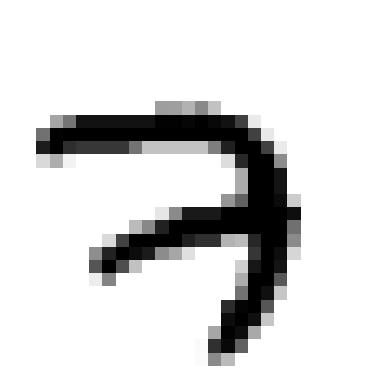

In [114]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [115]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [116]:
X_valid.shape

(5000, 28, 28)

In [117]:
X_test.shape

(10000, 28, 28)

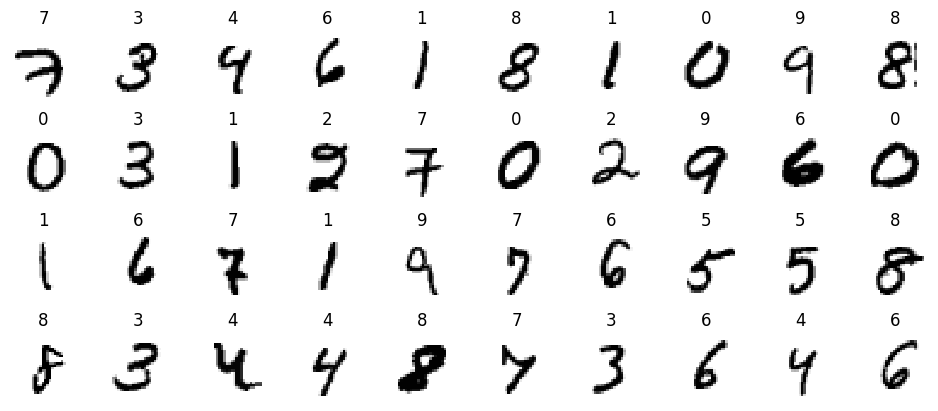

In [118]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [119]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [120]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [122]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [123]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 13s 8ms/step - loss: nan - accuracy: 0.5951 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

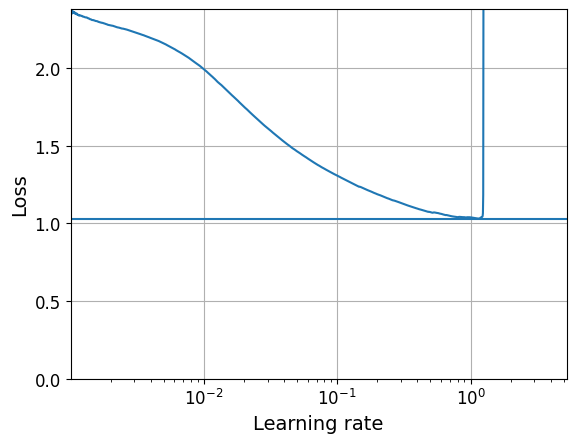

In [124]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [125]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [126]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [128]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [129]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2352 - accuracy: 0.9266 - val_loss: 0.1022 - val_accuracy: 0.9682
Epoch 2/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0943 - accuracy: 0.9704 - val_loss: 0.0949 - val_accuracy: 0.9720
Epoch 3/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0629 - accuracy: 0.9800 - val_loss: 0.0710 - val_accuracy: 0.9798
Epoch 4/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0463 - accuracy: 0.9848 - val_loss: 0.0768 - val_accuracy: 0.9796
Epoch 5/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0353 - accuracy: 0.9885 - val_loss: 0.0772 - val_accuracy: 0.9790
Epoch 6/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0781 - val_accuracy: 0.9808
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.0811 -

In [130]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0727 - accuracy: 0.9780


[0.0727415457367897, 0.9779999852180481]

In [131]:
%tensorboard --logdir=./my_mnist_logs --port=6006